**Introduction:**

*The iterative nature of research as a set of queries and solutions that increasingly hone your theories is specifically encouraged by this project design. As you learn in the session, you will begin with the literature review. Then, using a hazy theory or an area of interest to you, you will put the techniques you learned there into practice.*

*You still don't know a lot about the data or interesting phenomena at that stage, therefore your idea won't be flawless. You will learn more about your subject as you go along and regularly use the data provided to do practical tasks.*

*You will draft a brief summary of your project as the school draws to a close. It may or may not include results, but it must at the very least include a testable hypothesis. Other groups will trade abstracts with yours, and your mentors will provide feedback.*


In [1]:
#!pip install nilearn
#!pip install scipy

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy
from scipy import signal
import os
from scipy import stats
from statsmodels.stats.multitest import fdrcorrection
import nibabel as nib
import nilearn
from nilearn import image
from nilearn import signal
from nilearn.masking import compute_epi_mask
from nilearn.masking import apply_mask
from nilearn import datasets
from nilearn.input_data import NiftiMapsMasker

/home/vivek/.local/lib/python3.9/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


Loading fMRI data using Nibabel module.

In [2]:
img = nib.load('/home/vivek/Downloads/Data/sub-01_ses-1_task-rest_acq-fullbrain_run-1_bold.nii.gz')

**Visualisation of fMRI data.**


<OrthoSlicer3D: /home/vivek/Downloads/Data/sub-01_ses-1_task-rest_acq-fullbrain_run-1_bold.nii.gz (128, 128, 70, 300)>

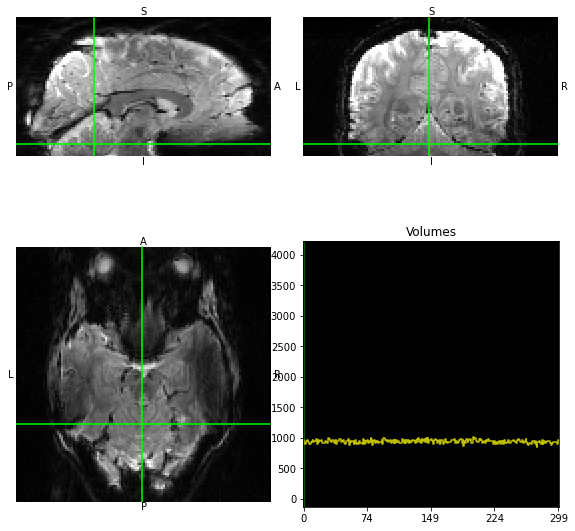

In [3]:
img.orthoview()

In [4]:
data = img.get_fdata()
np.shape(data)

(128, 128, 70, 300)

Extracting temporal componenet from fMRI

In [5]:
ts = data[:,0,0,:]
ts.shape

(128, 300)

**Preprocessing**

The presrocessing improves SNR on masked fMRI signals along with the following parameters:
    
    Detrend

    low- and high-pass filter

    remove confounds

    standardize

In [6]:
time_series = nilearn.signal.clean(ts, runs=None, detrend=True, standardize='zscore', sample_mask=None, confounds=None, standardize_confounds=True, low_pass=0.08, high_pass=0.009, t_r=2.5, ensure_finite=False)
np.shape(time_series)

(128, 300)

<AxesSubplot:>

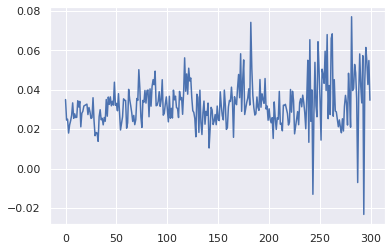

In [7]:
sb.set_theme(style="darkgrid")

# Plot the responses for different events and regions
sb.lineplot(data=time_series[0])

**Computing & Visualisation of Voxel to Voxel Correlations**

In [8]:
corr = np.zeros([len(time_series), 128])
pvalues = np.zeros([len(time_series), 128])
a = time_series
for t in range(0, 128):
    y = a[t]
    for p in range(0, 128):
        x = a[p]
        cor, pval = scipy.stats.pearsonr(x, y)
        corr[t, p] = (cor)
        pvalues[t, p] = (pval)

In [9]:
corr.shape

(128, 128)

<AxesSubplot:>

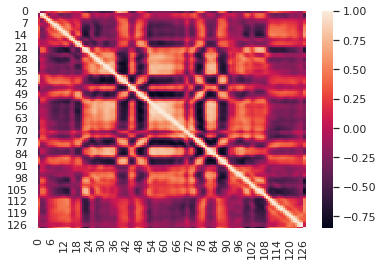

In [10]:
sb.heatmap(corr)

**Loading and correlating Physiological data**

In [11]:
import pandas as pd
physio = pd.read_csv('/home/vivek/Documents/temp/sub-01_ses-1_cardiac.tsv')
physio_data = np.array(physio)

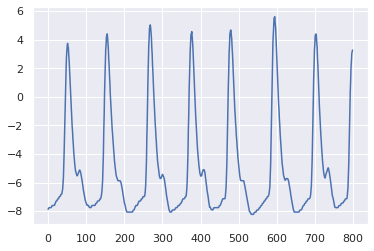

In [12]:
plt.plot(physio_data[0:800])

**Linear Regression**
*In the statistical regression technique known as linear regression, we have one regressand, or dependent variable, and one or more regressors. The method of modeling or establishing a connection between these two is linear, hence the name "linear regression." Many linear regression is used when there are multiple regressors as opposed to basic linear regression, which is used when there is only one regressor.*

/home/vivek/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

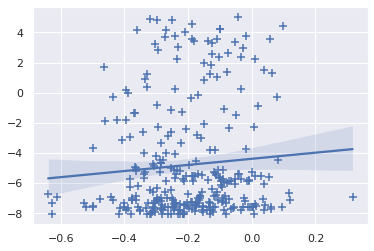

In [14]:
sb.regplot(time_series[102], physio_data[0:300], x_estimator=np.mean, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, marker='+', scatter_kws=None, line_kws=None, ax=None)